The QP cannot handle the full dataset; nor do we have enough data to cover the full lifetime of the generation assets (we have 10 years of data but we assume all assets have a lifetime of 25 years). 

100 bootstrap samples are therefore used to estimate the solution i.e., the efficient frontier. 2 years worth of data is used to compute each efficient frontier. For the reproducibility of the experiment, we constuct a table to record the indicies of the original data used in each run. 


In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

import pickle

random.seed(2468) # set the seed for reproducibility

In [2]:
file = open('../../preprocessing/s_demand.pkl', 'rb')
s_demand = pickle.load(file)
file.close()
dt_indices=pd.DataFrame(columns=['AEST'], data=s_demand.index)
N_rows=int(len(dt_indices))
N_days=int(N_rows/24)
N_days

3653

In [3]:
N_b=100 # number of bootstrap samples
N_days= 365*2 # number of samples per hour; 2 years

for hour in range(24):
    cand=np.arange(hour, N_rows+hour, 24)
    D=0
    while D<N_b:
        d=random.choices(cand, k=N_days)
        if D==0:
            M_hour=np.array(d)
        else:
            M_hour=np.vstack([M_hour, np.array(d)])
        
        D+=1
    
    if hour==0:
        M=M_hour
    else:
        M=np.hstack([M, M_hour])
M.sort(axis=1)

In [4]:
M.shape

(100, 17520)

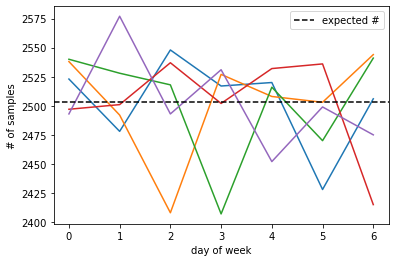

In [5]:
for d in [2,17,47,79, 93]:
    _datetime=dt_indices.loc[M[d],'AEST']
    _dayofweek=_datetime.dt.dayofweek.values
    values, counts=np.unique(_dayofweek, return_counts=True) 
    plt.plot(values, counts)
    
plt.axhline(N_days*24/7, color='k', linestyle='--', label='expected #')

plt.legend()
plt.xlabel('day of week')
plt.ylabel('# of samples')
plt.show()

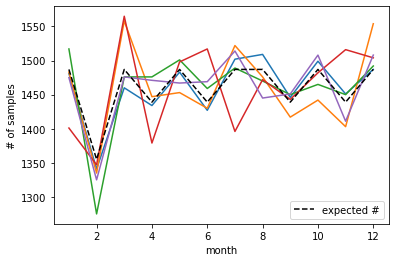

In [6]:
n_monthdays=np.array([31, 28.25, 31,30,31,30,31, 31, 30, 31, 30, 31])
for d in [2,17,47,79, 93]:
    _datetime=dt_indices.loc[M[d],'AEST']
    _month=_datetime.dt.month.values
    values, counts=np.unique(_month, return_counts=True) 
    plt.plot(values, counts)
plt.plot(np.arange(1,13), n_monthdays*N_days*24/12/(n_monthdays.mean()), color='k', linestyle='--', 
         label='expected #')    
plt.xlabel('month')
plt.ylabel('# of samples')
plt.legend()
plt.show()

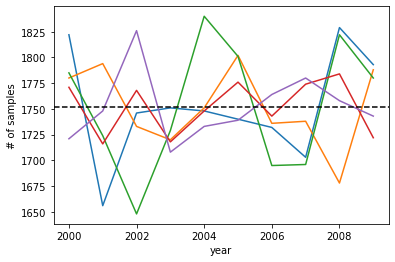

In [7]:
for d in [2,17,47,79, 93]:
    _datetime=dt_indices.loc[M[d],'AEST']
    _year=_datetime.dt.year.values
    values, counts=np.unique(_year, return_counts=True) 
    plt.plot(values, counts)

plt.axhline(N_days*24/10, color='k', linestyle='--')    

plt.xlabel('year')
plt.ylabel('# of samples')
plt.show()

In [8]:
# pickle
import pickle

file = open('M_bootstrap.pkl', 'wb')

# dump information to that file
pickle.dump(M, file)

# close the file
file.close()

